<a href="https://www.kaggle.com/code/yasinsoylu123/brain-tumor-classification?scriptVersionId=116532361" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import seaborn as sns
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, Activation,Concatenate
from tensorflow.keras.layers import BatchNormalization
from keras.preprocessing.image import load_img,img_to_array,ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tqdm import tqdm
import os
from sklearn.utils import shuffle

import ipywidgets as widgets
import io
from PIL import Image
from IPython.display import display,clear_output
from warnings import filterwarnings

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(84).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(44).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(245).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/6.jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(238).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(196).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(108).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(310).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image (5).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(186).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(29).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(140).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(224).jpg

In [2]:
labels = ['glioma_tumor','no_tumor','meningioma_tumor','pituitary_tumor']


In [3]:
X_train = []
y_train = []
image_size = 150
for i in labels:
    folderPath = os.path.join('../input/brain-tumor-classification-mri','Training',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size, image_size))
        X_train.append(img)
        y_train.append(i)
        
for i in labels:
    folderPath = os.path.join('../input/brain-tumor-classification-mri','Testing',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        y_train.append(i)
        
X_train = np.array(X_train)
y_train = np.array(y_train)

100%|██████████| 74/74 [00:00<00:00, 83.75it/s]


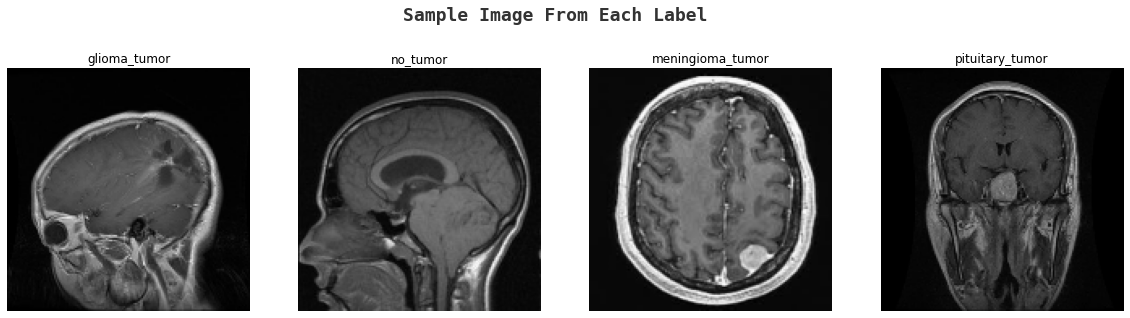

In [4]:
k=0
fig, ax = plt.subplots(1,4,figsize=(20,20))
fig.text(s='Sample Image From Each Label',size=18,fontweight='bold',
             fontname='monospace',y=0.62,x=0.4,alpha=0.8)
for i in labels:
    j=0
    while True :
        if y_train[j]==i:
            ax[k].imshow(X_train[j])
            ax[k].set_title(y_train[j])
            ax[k].axis('off')
            k+=1
            break
        j+=1

In [5]:
X_train, y_train = shuffle(X_train,y_train, random_state=101)
X_train.shape

(3264, 150, 150, 3)

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train, test_size=0.1,random_state=101)

In [7]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)


y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)




In [8]:
model = Sequential()

model.add(Conv2D(64, (3, 3), padding='same',input_shape=(image_size,image_size,3))) 
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3))) 
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(BatchNormalization())
model.add(Dropout(0.35))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization()) 

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(BatchNormalization())
model.add(Dropout(0.35)) #64 --> 42

model.add(Conv2D(64, (3, 3), padding='same')) 
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Flatten()) 
model.add(Dropout(0.5)) 
model.add(Dense(512)) 
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dense(4)) 
model.add(Activation('softmax'))

model.summary()

2023-01-16 19:15:24.914092: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-16 19:15:25.029990: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-16 19:15:25.030764: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-16 19:15:25.032887: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 64)      1792      
_________________________________________________________________
activation (Activation)      (None, 150, 150, 64)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 150, 150, 64)      256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 148, 148, 64)      36928     
_________________________________________________________________
activation_1 (Activation)    (None, 148, 148, 64)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 74, 74, 64)        2

ead from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-16 19:15:27.204627: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15403 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


In [9]:
batch_size=32
epochs = 50

In [10]:
model.compile(optimizer = 'adam',
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

In [11]:
tensorboard = TensorBoard(log_dir = 'logs')
checkpoint = ModelCheckpoint("cnn.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, patience = 2, min_delta = 0.001,
                              mode='auto',verbose=1)

2023-01-16 19:15:27.780568: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2023-01-16 19:15:27.780606: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2023-01-16 19:15:27.782535: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1614] Profiler found 1 GPUs
2023-01-16 19:15:28.007888: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2023-01-16 19:15:28.008098: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1748] CUPTI activity buffer flushed


In [12]:
history = model.fit(X_train,y_train,validation_split=0.1, epochs =25, verbose=1, batch_size=32,
                   callbacks=[tensorboard,checkpoint,reduce_lr])

2023-01-16 19:15:28.569341: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/25


2023-01-16 19:15:30.442284: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


 1/83 [..............................] - ETA: 11:33 - loss: 1.9548 - accuracy: 0.2500

2023-01-16 19:15:37.123162: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2023-01-16 19:15:37.123211: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.


 2/83 [..............................] - ETA: 30s - loss: 3.2234 - accuracy: 0.3906  

2023-01-16 19:15:37.474877: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2023-01-16 19:15:37.475493: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1748] CUPTI activity buffer flushed
2023-01-16 19:15:37.607462: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:673]  GpuTracer has collected 256 callback api events and 253 activity events. 
2023-01-16 19:15:37.618220: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2023-01-16 19:15:37.633692: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/train/plugins/profile/2023_01_16_19_15_37

2023-01-16 19:15:37.639817: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to logs/train/plugins/profile/2023_01_16_19_15_37/b336c05bf546.trace.json.gz
2023-01-16 19:15:37.662660: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/train/plug

83/83 [==============================] - 14s 71ms/step - loss: 1.2466 - accuracy: 0.6617 - val_loss: 5.3088 - val_accuracy: 0.2585

Epoch 00001: val_accuracy improved from -inf to 0.25850, saving model to cnn.h5
Epoch 2/25
83/83 [==============================] - 4s 54ms/step - loss: 0.5053 - accuracy: 0.8089 - val_loss: 2.5221 - val_accuracy: 0.3605

Epoch 00002: val_accuracy improved from 0.25850 to 0.36054, saving model to cnn.h5
Epoch 3/25
83/83 [==============================] - 5s 55ms/step - loss: 0.3351 - accuracy: 0.8729 - val_loss: 0.5888 - val_accuracy: 0.7959

Epoch 00003: val_accuracy improved from 0.36054 to 0.79592, saving model to cnn.h5
Epoch 4/25
83/83 [==============================] - 4s 54ms/step - loss: 0.2936 - accuracy: 0.8933 - val_loss: 0.7106 - val_accuracy: 0.7041

Epoch 00004: val_accuracy did not improve from 0.79592
Epoch 5/25
83/83 [==============================] - 4s 54ms/step - loss: 0.2785 - accuracy: 0.8952 - val_loss: 0.4292 - val_accuracy: 0.8912


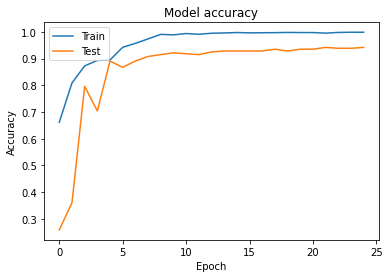

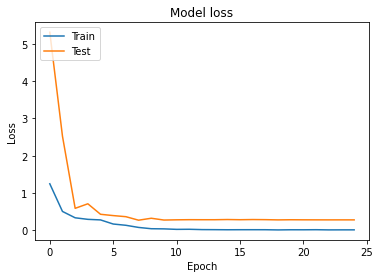

In [13]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot loss values vs epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# EfficientNetB0

In [14]:
effnet = EfficientNetB0(weights='imagenet',include_top=False,input_shape=(image_size,image_size,3))

16719872/16705208 [==============================] - 0s 0us/step


In [15]:
model = effnet.output
model = tf.keras.layers.GlobalAveragePooling2D()(model)
model = tf.keras.layers.Dropout(rate=0.5)(model)
model = tf.keras.layers.Dense(4,activation='softmax')(model)
model = tf.keras.models.Model(inputs=effnet.input, outputs = model)

In [16]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, 150, 150, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
normalization (Normalization)   (None, 150, 150, 3)  7           rescaling[0][0]                  
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 151, 151, 3)  0           normalization[0][0]              
______________________________________________________________________________________________

In [17]:
model.compile(loss='categorical_crossentropy',optimizer = 'Adam', metrics= ['accuracy'])

In [18]:
earlystop = EarlyStopping(monitor='val_loss', patience=5)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]

In [19]:
history = model.fit(X_train, y_train, batch_size = 64, validation_data = (X_test, y_test),
                     epochs = 20, callbacks =[callbacks] )

Epoch 1/20
46/46 [==============================] - 20s 252ms/step - loss: 0.4375 - accuracy: 0.8396 - val_loss: 0.6673 - val_accuracy: 0.7982
Epoch 2/20
46/46 [==============================] - 10s 212ms/step - loss: 0.1324 - accuracy: 0.9544 - val_loss: 0.6150 - val_accuracy: 0.8624
Epoch 3/20
46/46 [==============================] - 10s 213ms/step - loss: 0.0734 - accuracy: 0.9748 - val_loss: 0.3740 - val_accuracy: 0.9144
Epoch 4/20
46/46 [==============================] - 10s 212ms/step - loss: 0.0521 - accuracy: 0.9809 - val_loss: 0.2342 - val_accuracy: 0.9358
Epoch 5/20
46/46 [==============================] - 10s 211ms/step - loss: 0.0551 - accuracy: 0.9840 - val_loss: 0.3235 - val_accuracy: 0.9174
Epoch 6/20
46/46 [==============================] - 10s 211ms/step - loss: 0.0547 - accuracy: 0.9796 - val_loss: 0.6498 - val_accuracy: 0.8899
Epoch 7/20
46/46 [==============================] - 10s 211ms/step - loss: 0.0615 - accuracy: 0.9785 - val_loss: 0.1984 - val_accuracy: 0.9266

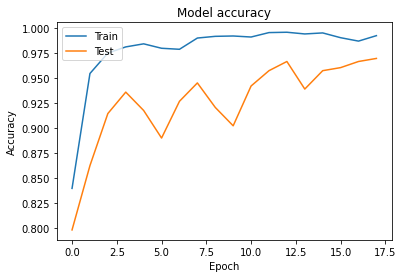

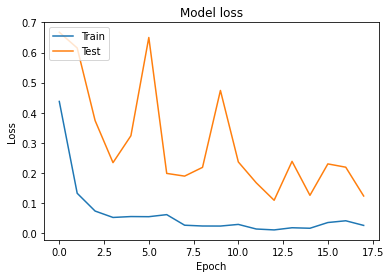

In [20]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot loss values vs epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# vgg16

In [21]:
vgg_model=VGG16(input_shape=(image_size,image_size,3) , weights='imagenet' , include_top=False,pooling="max")


58900480/58889256 [==============================] - 0s 0us/step


In [22]:
for layer in vgg_model.layers:
    layer.trainable  = False

In [23]:
vgg_model.summary()


Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [24]:
model = Sequential()
model.add(vgg_model)

model.add(Flatten()) 
model.add(Activation('relu'))
Dropout(rate=0.5)
model.add(Dense(4)) 
model.add(Activation('softmax'))



model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 512)               14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
_________________________________________________________________
activation_7 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 2052      
_________________________________________________________________
activation_8 (Activation)    (None, 4)                 0         
Total params: 14,716,740
Trainable params: 2,052
Non-trainable params: 14,714,688
_________________________________________________________________


In [25]:
model.compile(optimizer = 'adam',
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

In [26]:
tensorboard = TensorBoard(log_dir = 'logs')
checkpoint = ModelCheckpoint("effnet.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, patience = 2, min_delta = 0.001,
                              mode='auto',verbose=1)

2023-01-16 19:21:00.963298: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2023-01-16 19:21:00.963474: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2023-01-16 19:21:01.206843: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2023-01-16 19:21:01.207012: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1748] CUPTI activity buffer flushed


In [28]:
history = model.fit(X_train, y_train, batch_size = batch_size, validation_data = (X_test, y_test),
                    steps_per_epoch = len(X_train) / batch_size, epochs = 20, callbacks =[tensorboard,checkpoint,reduce_lr])

Epoch 1/20
 2/91 [..............................] - ETA: 18s - loss: 0.2740 - accuracy: 0.9062

2023-01-16 19:22:31.999981: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2023-01-16 19:22:32.000031: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.


 3/91 [..............................] - ETA: 18s - loss: 0.6241 - accuracy: 0.8958

2023-01-16 19:22:32.201478: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2023-01-16 19:22:32.202168: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1748] CUPTI activity buffer flushed
2023-01-16 19:22:32.341038: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:673]  GpuTracer has collected 125 callback api events and 122 activity events. 
2023-01-16 19:22:32.345750: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2023-01-16 19:22:32.350130: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/train/plugins/profile/2023_01_16_19_22_32

2023-01-16 19:22:32.353248: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to logs/train/plugins/profile/2023_01_16_19_22_32/b336c05bf546.trace.json.gz
2023-01-16 19:22:32.360356: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/train/plug

91/91 [==============================] - 4s 40ms/step - loss: 0.5261 - accuracy: 0.9036 - val_loss: 1.6864 - val_accuracy: 0.8073

Epoch 00001: val_accuracy did not improve from 0.81957
Epoch 2/20
91/91 [==============================] - 4s 40ms/step - loss: 0.5261 - accuracy: 0.9036 - val_loss: 1.6862 - val_accuracy: 0.8073

Epoch 00002: val_accuracy did not improve from 0.81957
Epoch 3/20
91/91 [==============================] - 3s 36ms/step - loss: 0.5260 - accuracy: 0.9033 - val_loss: 1.6861 - val_accuracy: 0.8073

Epoch 00003: val_accuracy did not improve from 0.81957

Epoch 00003: ReduceLROnPlateau reducing learning rate to 6.561000276406048e-08.
Epoch 4/20
91/91 [==============================] - 4s 40ms/step - loss: 0.5259 - accuracy: 0.9033 - val_loss: 1.6861 - val_accuracy: 0.8073

Epoch 00004: val_accuracy did not improve from 0.81957
Epoch 5/20
91/91 [==============================] - 4s 40ms/step - loss: 0.5259 - accuracy: 0.9033 - val_loss: 1.6860 - val_accuracy: 0.8073



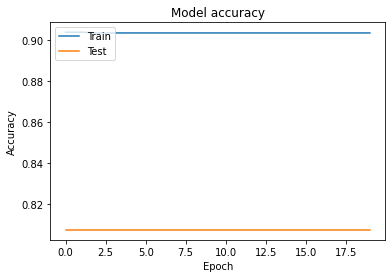

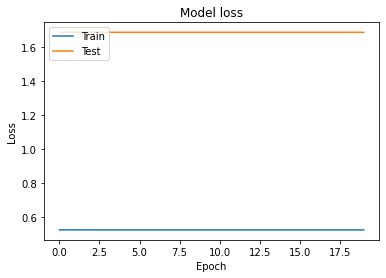

In [29]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot loss values vs epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [30]:
pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)

In [31]:
from sklearn.metrics import classification_report

print(classification_report(y_test_new,pred))


              precision    recall  f1-score   support

           0       0.83      0.82      0.82        93
           1       0.84      0.84      0.84        51
           2       0.77      0.70      0.73        96
           3       0.80      0.90      0.85        87

    accuracy                           0.81       327
   macro avg       0.81      0.81      0.81       327
weighted avg       0.81      0.81      0.81       327



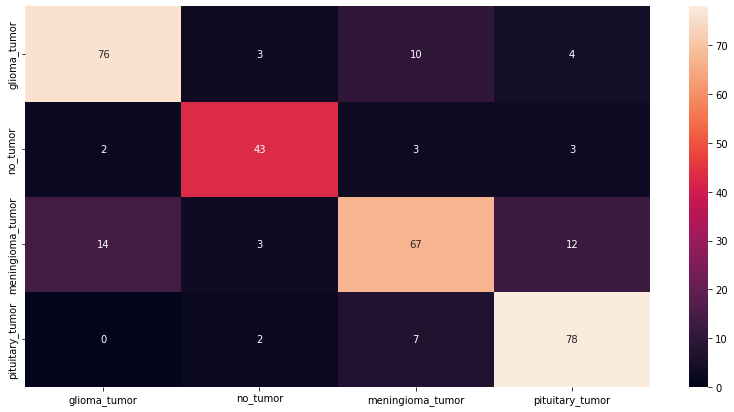

In [32]:
from sklearn.metrics import confusion_matrix

fig,ax=plt.subplots(1,1,figsize=(14,7))
sns.heatmap(confusion_matrix(y_test_new,pred),ax=ax,xticklabels=labels,yticklabels=labels,annot=True)


plt.show()

In [33]:
def img_pred(upload):
    for name, file_info in uploader.value.items():
        img = Image.open(io.BytesIO(file_info['content']))
    opencvImage = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)
    img = cv2.resize(opencvImage,(150,150))
    img = img.reshape(1,150,150,3)
    p = model.predict(img)
    p = np.argmax(p,axis=1)[0]

    if p==0:
        p='Glioma Tumor'
    elif p==1:
        print('The model predicts that there is no tumor')
    elif p==2:
        p='Meningioma Tumor'
    else:
        p='Pituitary Tumor'

    if p!=1:
        print(f'The Model predicts that it is a {p}')

In [34]:
import ipywidgets as widgets

uploader = widgets.FileUpload()
display(uploader)

FileUpload(value={}, description='Upload')

In [35]:
from IPython.display import display,clear_output

button = widgets.Button(description='Predict')
out = widgets.Output()
def on_button_clicked(_):
    with out:
        clear_output()
        try:
            img_pred(uploader)
            
        except:
            print('No Image Uploaded/Invalid Image File')
button.on_click(on_button_clicked)
widgets.VBox([button,out])